# <center>Análisis Exploratorio de Datos ENACOM</center>


Este estudio tiene como objetivo analizar la penetración y las características del acceso a internet en Argentina a partir de un conjunto de datos públicos. Los datos, originalmente en formato xlsx, han sido procesados y estructurados para facilitar su análisis.

Objetivos específicos:

•Cuantificar la penetración de internet: Determinar el porcentaje de hogares con acceso a internet a nivel nacional y provincial.  
•Caracterizar las tecnologías: Identificar las tecnologías de acceso a internet más utilizadas y su distribución geográfica.  
•Evaluar la calidad del servicio: Analizar las velocidades de conexión y su variabilidad entre provincias y tecnologías.  
•Identificar brechas digitales: Comparar la penetración y la calidad del servicio entre diferentes regiones del país.

Metodología:

El análisis se llevará a cabo en varias etapas:

•Limpieza y transformación de datos: Se realizarán tareas de limpieza para corregir inconsistencias y valores faltantes. Los datos serán transformados para facilitar su análisis, como la creación de nuevas variables o la agrupación de categorías.  
•Análisis exploratorio: Se utilizarán técnicas de visualización (histogramas, gráficos de líneas, etc.) para explorar la distribución de las variables y identificar patrones iniciales.  
•Análisis estadístico: Se aplicarán pruebas estadísticas para comparar grupos, identificar correlaciones y modelar la relación entre variables.

Hipótesis de trabajo:
Se espera encontrar diferencias significativas en la penetración y calidad del acceso a internet entre las diferentes regiones del país, influenciadas por factores como el nivel de desarrollo económico, la densidad poblacional y las políticas públicas.

Resultados esperados:

Los resultados de este análisis permitirán:

•Caracterizar el panorama del acceso a internet en Argentina: Identificando las fortalezas y debilidades del sistema.  
•Identificar áreas de mejora: Detectando las regiones con menor acceso y calidad de servicio.  
•Informar la toma de decisiones: Proporcionando información relevante para diseñar políticas públicas y estrategias de inversión en infraestructura de telecomunicaciones.

Próximos pasos:
En las siguientes secciones se detallarán los resultados obtenidos en cada etapa del análisis, incluyendo la descripción de los datos, los métodos utilizados y las principales conclusiones.


In [102]:
#Importo las librerías necesarias

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
%matplotlib inline
from plotnine import *
import matplotlib.pyplot as plt
import plotly.express as px

In [103]:
# Cargo los datasets elegidos para el análisis


internet_3 = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/Accesos_tecnologia_localidad.csv")
internet_4 = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/Velocidad % por prov.csv")
internet_6 = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/Totales Accesos Por Tecnología.csv")
internet_9 = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/Penetracion-hogares.csv")
internet_10 = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/Penetracion_totales.csv")
internet_12 = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/Accesos por velocidad.csv")
mapa_conectividad = pd.read_csv("C:/Users/jugas/Proyecto_PIDA/Proyecto/data/mapa_conectividad.csv")

In [104]:
#Página 3 "Accesos_tecnologia_localidad"

internet_3.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,25 de Mayo,25 de Mayo,755,4600,0,2,0,742,0,727
1,BUENOS AIRES,25 de Mayo,Del Valle,181,0,0,0,10,1,0,0
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,782,0,496,16,0,0,185
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,0,0,0,0,0,0,6


In [105]:
print(internet_3.dtypes)

Provincia       object
Partido         object
Localidad       object
ADSL             int64
CABLEMODEM       int64
DIAL UP          int64
FIBRA OPTICA     int64
OTROS            int64
SATELITAL        int64
WIMAX            int64
WIRELESS         int64
dtype: object


Para comenzar con el análisis de esta hoja, se decide hacer un gráfico de líneas que dibujen una curva en función de la proporción de cada tecnología según la provincia en la que se encuentra.


In [106]:
# Se agrupa por localidad y se calculan las proporciones
df_proporciones = internet_3.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum()
df_proporciones['Total'] = df_proporciones.sum(axis=1)
df_proporciones = df_proporciones.div(df_proporciones['Total'], axis=0)
df_proporciones.drop('Total', axis=1, inplace=True)

# Se traspone el dataframe para tener las tecnologías como columnas
df_proporciones = df_proporciones.T

Observación de la cantidad de accesos de cada tecnología por provincia


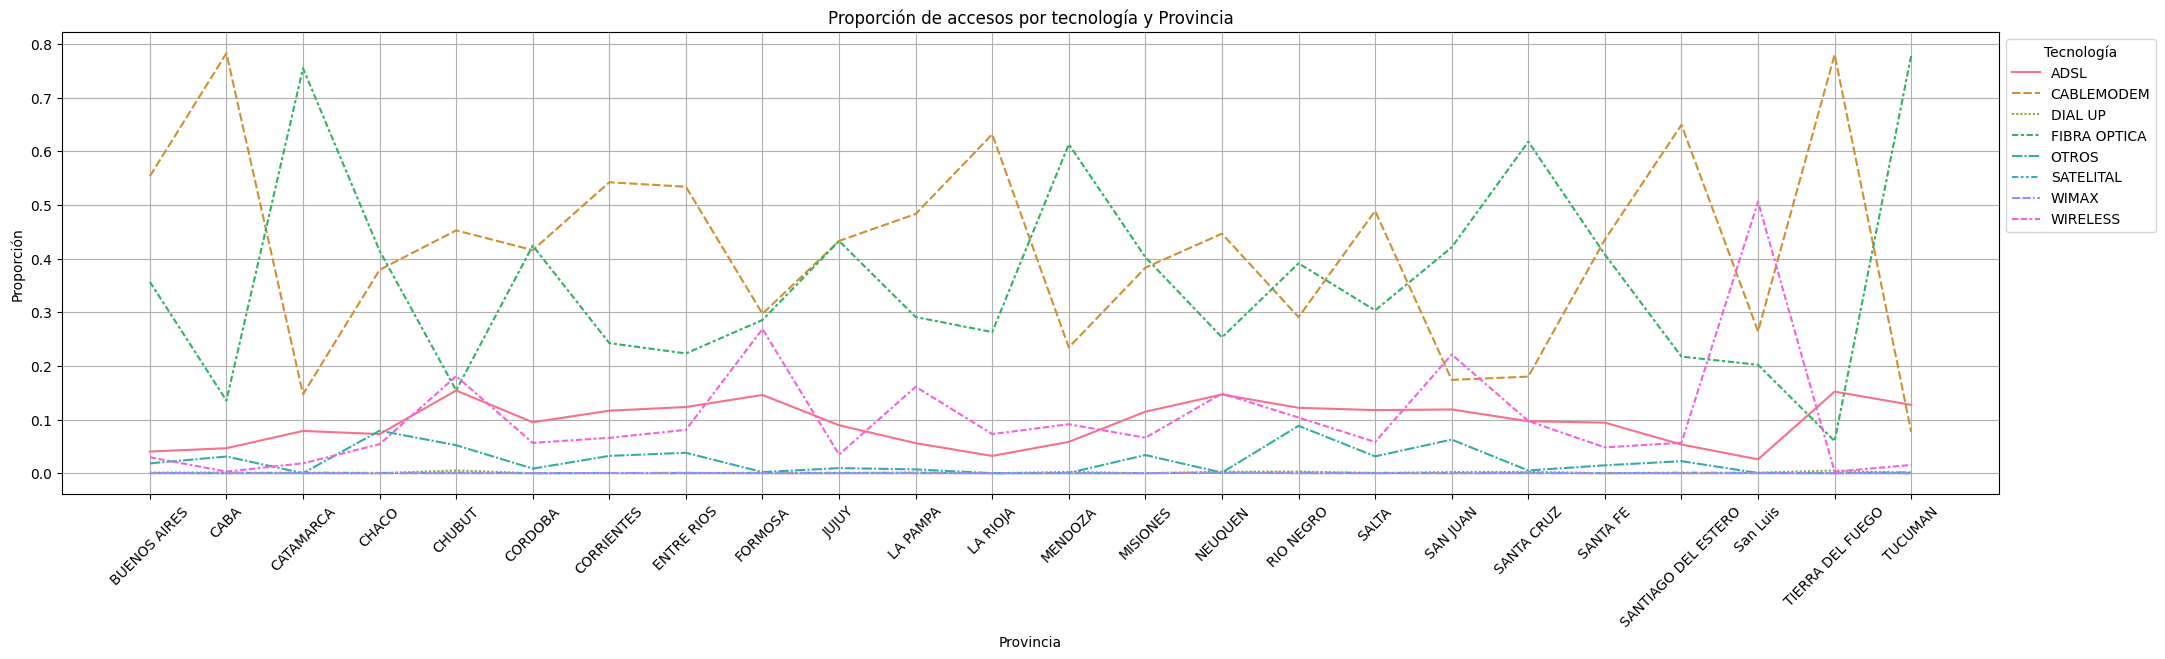

In [108]:

df_pivotado = df_proporciones.T

# Crear el gráfico de líneas con líneas sólidas y una paleta de colores definida
plt.figure(figsize=(25, 6))
sns.lineplot(data=df_pivotado, palette="husl", linestyle="solid")
plt.title('Proporción de accesos por tecnología y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Proporción')
plt.legend(title='Tecnología', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Desigualdad en el Acceso: La Brecha Digital Provincial

Los gráficos evidencian de manera clara una desigualdad significativa en el acceso a diferentes tecnologías de internet entre las provincias. Esta disparidad se manifiesta en la variabilidad de la proporción de accesos a cada tecnología, lo cual sugiere la existencia de una brecha digital provincial.

Factores que podrían explicar esta desigualdad:

Infraestructura: La calidad y disponibilidad de infraestructura de telecomunicaciones varía considerablemente entre provincias, afectando directamente el acceso a internet de alta velocidad.
Políticas públicas: Las políticas de inversión en infraestructura y conectividad, así como los incentivos para la expansión de servicios de internet, pueden influir significativamente en la brecha digital.
Desarrollo socioeconómico: El nivel de desarrollo económico de cada provincia, medido por indicadores como el PIB per cápita, puede estar relacionado con la capacidad de inversión en tecnologías de la información y la comunicación.
Densidad poblacional: Las áreas rurales y con baja densidad poblacional suelen tener menor acceso a servicios de internet en comparación con las zonas urbanas.

2. Dominancia Tecnológica y Transición Digital

La posición relativa de las líneas en el gráfico revela una clara tendencia hacia la dominancia de ciertas tecnologías en cada provincia. Es probable que la fibra óptica sea la tecnología que muestra un mayor crecimiento y penetración en la mayoría de las provincias, desplazando gradualmente a tecnologías más antiguas como el ADSL y el dial-up.

Esta transición hacia tecnologías de mayor velocidad y capacidad refleja una evolución hacia una sociedad cada vez más digitalizada. Sin embargo, la velocidad y el alcance de esta transición varían considerablemente entre provincias, lo que refuerza la idea de una brecha digital persistente.

3. Evolución Diferencial y Tendencias Futuras

Aunque el gráfico no proporciona información explícita sobre la evolución temporal de los accesos, podemos inferir que la proporción de accesos a diferentes tecnologías ha experimentado cambios significativos a lo largo del tiempo.

Tendencias esperadas:

Consolidación de la fibra óptica: Se espera que la fibra óptica continúe consolidándose como la tecnología dominante en los próximos años, gracias a su mayor velocidad y capacidad.
Crecimiento de las tecnologías inalámbricas: Las tecnologías inalámbricas, como el 5G, podrían experimentar un crecimiento significativo, especialmente en áreas rurales y remotas donde la infraestructura de fibra óptica es limitada.
Convergencia tecnológica: Es probable que se observe una mayor convergencia entre las diferentes tecnologías, con la integración de servicios de telefonía fija, móvil y televisión por internet en una misma plataforma.
Implicaciones y Recomendaciones

Reducción de la brecha digital: Es necesario implementar políticas públicas que promuevan la expansión de la infraestructura de telecomunicaciones en las áreas con menor acceso, especialmente en las zonas rurales y de baja densidad poblacional.
Fomento de la innovación: Se debe fomentar la investigación y el desarrollo de nuevas tecnologías que permitan reducir los costos de acceso a internet y mejorar la calidad de los servicios.
Educación digital: Es fundamental invertir en programas de educación digital para capacitar a la población en el uso de las tecnologías de la información y la comunicación.
Monitoreo y evaluación: Es necesario establecer sistemas de monitoreo y evaluación para medir el progreso en la reducción de la brecha digital y el impacto de las políticas públicas implementadas.
En conclusión, el análisis del gráfico revela una compleja realidad en términos de acceso a internet en las diferentes provincias. La existencia de una brecha digital significativa y la evolución diferencial en la adopción de tecnologías plantean importantes desafíos y oportunidades para el desarrollo socioeconómico de las regiones.


In [109]:
#Página 4 "Velocidad % por prov"

internet_4.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


Se decide agrupar la media de bajada por año para analizar graficamente la evolución anual


In [110]:

import pandas as pd
import plotly.express as px

# Suponiendo que 'internet_4' es tu DataFrame original

# Crear el gráfico de líneas interactivo con botones para seleccionar años y provincias
fig = px.line(
    internet_4,
    x="Año",
    y="Mbps (Media de bajada)",
    color="Provincia",
    title="Evolución de la velocidad media de descarga por provincia y año"
)

# Agregar botones para seleccionar años
years = internet_4['Año'].unique()
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(
                    args=[{"visible": [True if y == year else False for y in internet_4['Año']]}],
                    label=str(year),
                    method="update"
                ) for year in years
            ]),
        ),
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(
                    args=[{"visible": [True if p == provincia else False for p in internet_4['Provincia']]}],
                    label=provincia,
                    method="update"
                ) for provincia in internet_4['Provincia'].unique()
            ]),
        )
    ]
)

fig.show()

Crecimiento sostenido: La velocidad media de descarga ha mostrado un aumento constante año tras año, lo que sugiere una mejora continua en las infraestructuras y tecnologías de telecomunicaciones.

Aceleración en años recientes: El crecimiento parece haberse acelerado en los últimos años, con un aumento más pronunciado en las velocidades a partir de cierto punto (este punto exacto dependería de los datos específicos del gráfico). Esto puede indicar una mayor inversión en infraestructura de banda ancha y una mayor demanda de servicios de internet de alta velocidad por parte de los usuarios.

Variabilidad entre años: Aunque la tendencia general es ascendente, se pueden observar algunas variaciones entre años. Por ejemplo, puede haber años en los que el crecimiento sea más moderado o incluso se produzca una ligera disminución. Estas variaciones pueden estar influenciadas por factores como cambios en las políticas regulatorias, eventos económicos o desastres naturales.


In [111]:
#Página 6 "Totales Accesos por tecnología"

internet_6.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023


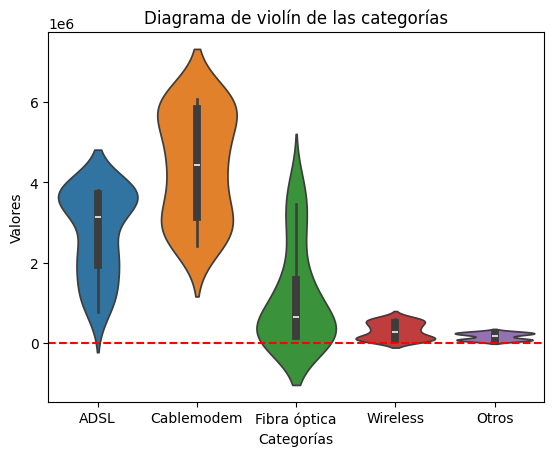

In [112]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

sns.violinplot(data=internet_6[columnas])

plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Diagrama de violín de las categorías')
plt.axhline(y=1000, color='r', linestyle='--')

plt.show()

Conclusión preliminar en función del gráfico:

Distribución de los datos: Los violines nos muestran la densidad de los datos para cada categoría. En este caso, observamos que la mayoría de los datos se concentran en la parte inferior del rango para todas las categorías, lo que sugiere que la mayoría de las conexiones a internet tienen un valor relativamente bajo.

Presencia de outliers: Los puntos individuales fuera de los violines representan valores atípicos (outliers). En este caso, parece haber algunos outliers en las categorías "Cablemodem" y "Fibra óptica", lo que indica que existen algunas conexiones con valores muy altos en comparación con el resto.

Comparación entre categorías: Podemos comparar la distribución de los datos entre las diferentes categorías. Por ejemplo, parece que la categoría "Fibra óptica" tiene una mayor variabilidad en los valores, mientras que la categoría "Otros" tiene una distribución más concentrada.

Predominan las conexiones de baja velocidad: La concentración de datos en la parte inferior del rango sugiere que la mayoría de las conexiones a internet en tu conjunto de datos son de baja velocidad.

Heterogeneidad en la tecnología "Fibra óptica": La mayor variabilidad en la categoría "Fibra óptica" podría indicar que existen diferentes tipos de planes o servicios de fibra óptica con velocidades muy dispares.

Posibles errores en los datos "Otros": La distribución muy concentrada de la categoría "Otros" podría sugerir que hay pocos datos en esta categoría o que los datos están agrupados de manera inusual.

Para comparar la dispersión de las velocidades de internet entre las tecnologías de fibra óptica y cablemódem, se utilizó el IQR. Esta medida es particularmente útil cuando se sospecha que existen valores atípicos en los datos, como podría ocurrir en el caso de velocidades de conexión extremadamente altas o bajas

In [113]:
Q1_fibra = internet_6["Fibra óptica"].quantile(0.25)
Q1_cable = internet_6["Cablemodem"].quantile(0.25) 

Q3_fibra = internet_6["Fibra óptica"].quantile(0.75)
Q3_cable = internet_6["Cablemodem"].quantile(0.75) 

IQR_fibra = Q3_fibra - Q1_fibra
IQR_cable = Q3_cable - Q1_cable 

print(IQR_fibra)
print(IQR_cable)

1396150.0
2701402.0


Análisis de los Resultados de los Rangos Intercuartílicos (IQR):

IQR_fibra = 1396150.0: El 50% central de los datos de velocidad para la fibra óptica se encuentra dentro de un rango de 1396150 Mbps. Esto significa que hay una dispersión considerable en las velocidades de la fibra óptica.
IQR_cable = 2701402.0: El rango intercuartílico para el cablemódem es aún mayor, indicando una dispersión aún más amplia en las velocidades de este tipo de conexión.

Interpretación:

Se registra una desigualdad en la distribución de velocidades: El hecho de que el IQR del cablemódem sea mayor que el de la fibra óptica sugiere que las velocidades de conexión para cablemódem son más variables. Esto podría deberse a diversos factores como la distancia a la central, la antigüedad de la infraestructura, o la competencia en el mercado.

Posibles outliers: Un IQR alto puede indicar la presencia de valores atípicos (outliers) en los datos. Estos outliers podrían corresponder a conexiones con velocidades extremadamente altas o bajas, y podrían influir en el cálculo de la media y la desviación estándar.
Segmentación del mercado: Las diferencias en los IQR podrían sugerir que el mercado de internet se segmenta en diferentes grupos de usuarios con necesidades y características distintas. Por ejemplo, los usuarios de fibra óptica con velocidades muy altas podrían corresponder a usuarios empresariales o residenciales con altas demandas de ancho de banda.
Calidad del servicio: Un rango intercuartílico grande podría indicar una menor calidad de servicio, especialmente en el caso del cablemódem. Esto podría deberse a factores como la congestión de la red o la interferencia.

DISTRIBUCIÓN DE LOS DATOS


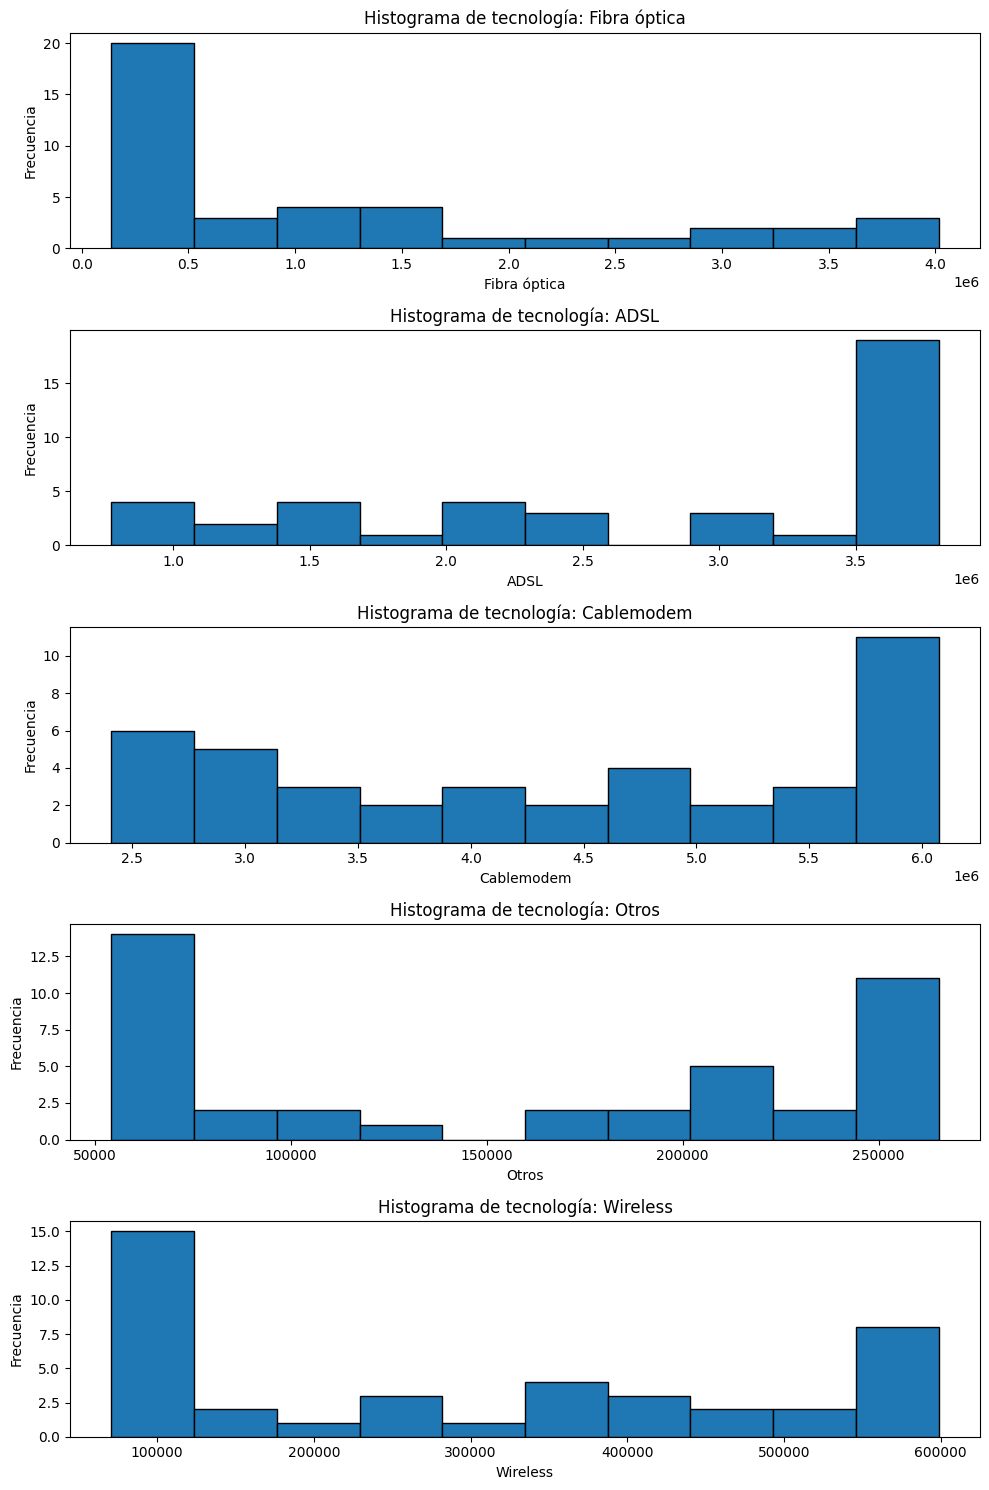

In [114]:
# Lista de tecnologías
tecnologias = ['Fibra óptica', 'ADSL', 'Cablemodem', 'Otros', 'Wireless']

#Creamos un gráfico con múltiples subgráficos
fig, axes = plt.subplots(nrows=len(tecnologias), ncols=1, figsize=(10, 15))

# Iteramos sobre cada tecnología y crear un histograma en cada subplot
for i, tecnologia in enumerate(tecnologias):
    axes[i].hist(internet_6[tecnologia], bins=10, edgecolor='black')
    axes[i].set_title(f'Histograma de tecnología: {tecnologia}')
    axes[i].set_xlabel(tecnologia)
    axes[i].set_ylabel('Frecuencia')

# Ajustamos el espaciado entre subgráficos
plt.tight_layout()

plt.show()

Análisis de los histogramas:

Fibra Óptica: La distribución de la fibra óptica muestra una concentración en un rango específico de valores, lo que sugiere una adopción más homogénea de esta tecnología en las diferentes provincias. Sin embargo, también hay una cola hacia la derecha que indica que algunas provincias tienen un número significativamente mayor de conexiones de fibra óptica.
ADSL: La distribución de ADSL es más dispersa, con varios picos y valles. Esto podría indicar una variabilidad mayor en la adopción de esta tecnología entre las provincias, posiblemente debido a la edad de la infraestructura o a factores geográficos.
Cablemódem: La distribución del cablemódem muestra una concentración en un rango más amplio de valores, lo que sugiere una adopción más generalizada de esta tecnología en comparación con el ADSL. Sin embargo, también hay algunas provincias con valores muy altos, lo que podría indicar una mayor penetración en ciertas áreas.
Otros: La distribución de "Otros" es muy dispersa, lo que indica una gran heterogeneidad en el tipo de tecnologías que se incluyen en esta categoría. Es posible que esta categoría incluya tecnologías emergentes o más específicas que no están clasificadas en las otras categorías.
Wireless: La distribución de Wireless también es bastante dispersa, con algunos valores muy altos. Esto sugiere una adopción significativa de tecnologías inalámbricas en algunas provincias, posiblemente debido a la falta de infraestructura de fibra óptica o cablemódem en ciertas áreas.

Conclusiones generales:

Heterogeneidad en la adopción: La distribución de las tecnologías varía significativamente entre las provincias, lo que indica una heterogeneidad en el acceso a internet a nivel regional.
Dominancia de ciertas tecnologías: La fibra óptica y el cablemódem parecen ser las tecnologías más dominantes, aunque la adopción de estas tecnologías varía considerablemente entre las provincias.
Coexistencia de tecnologías: A pesar de la creciente adopción de tecnologías de banda ancha, como la fibra óptica y el cablemódem, tecnologías más antiguas como el ADSL y las conexiones inalámbricas siguen siendo relevantes en algunas regiones.
Importancia de las tecnologías "Otros": La categoría "Otros" sugiere la existencia de una diversidad de tecnologías emergentes o específicas que pueden estar desempeñando un papel importante en ciertas regiones.
Implicaciones:

Brecha digital: La heterogeneidad en la adopción de tecnologías sugiere la existencia de una brecha digital entre las provincias, con algunas regiones teniendo un acceso más limitado a servicios de internet de alta velocidad.
Políticas públicas: Es necesario implementar políticas públicas que promuevan la expansión de la infraestructura de telecomunicaciones en las áreas con menor acceso, especialmente en las zonas rurales y de baja densidad poblacional.
Desarrollo económico: El acceso a internet de alta velocidad es fundamental para el desarrollo económico y social. Por lo tanto, reducir la brecha digital es esencial para impulsar el crecimiento y la innovación en todas las regiones.


In [115]:

import plotly.express as px

# Selecciono las columnas relevantes para el análisis
columnas_tecnologias = ['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_tecnologias = internet_6[columnas_tecnologias]

# Agrupo los datos por año y sumo los valores de cada tecnología
df_agrupado = df_tecnologias.groupby('Año').sum()

# Creamos el gráfico de área apilada interactivo con Plotly
fig = px.area(df_agrupado, x=df_agrupado.index, y=df_agrupado.columns,
              labels={'value':'Número de accesos (miles)'},
              title='Evolución de las tecnologías de acceso a internet en Argentina por año')


fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Número de accesos (miles)',
    legend_title='Tecnología'
)

fig.show()

El gráfico revela una dinámica interesante en la evolución de las tecnologías de acceso a internet en Argentina a lo largo de los años analizados. A continuación, se presentan las principales observaciones y conclusiones:

Dominancia inicial de ADSL: En los primeros años del período analizado, la tecnología ADSL dominó el mercado, siendo la opción preferida por los usuarios. Sin embargo, a partir de 2018, se observa una tendencia a la baja en su adopción.  
Ascenso meteórico del cablemódem: El cablemódem experimentó un crecimiento exponencial durante los primeros años, superando rápidamente al ADSL y convirtiéndose en la tecnología líder en el mercado. Este crecimiento se mantuvo sostenido hasta alcanzar su punto máximo en 2023.  
Emergencia y consolidación de la fibra óptica: A partir de 2021, se observa una clara tendencia ascendente en la adopción de la fibra óptica. Esta tecnología ha demostrado ser la más rápida y estable, lo que la convierte en la opción preferida para los usuarios que demandan mayores velocidades de conexión.  
Declive de las tecnologías inalámbricas y otras: Las tecnologías inalámbricas y otras opciones han mostrado una tendencia a la baja en términos de adopción, posiblemente debido a la mayor disponibilidad y mejores prestaciones de las tecnologías fijas como el cablemódem y la fibra óptica.  
Saturación del mercado: A partir de 2023, se observa una cierta saturación del mercado, con un crecimiento más moderado en el número total de accesos a internet. Esto sugiere que la mayoría de los hogares y empresas ya cuentan con acceso a internet.

Conclusiones generales:

El mercado de las tecnologías de acceso a internet en Argentina ha experimentado una evolución significativa en los últimos años, pasando de una dominancia inicial del ADSL a una mayor diversificación y una clara tendencia hacia tecnologías de mayor velocidad y estabilidad.
La fibra óptica se ha consolidado como la tecnología líder, gracias a sus ventajas en términos de velocidad y capacidad.
El cablemódem, aunque ha perdido parte de su cuota de mercado frente a la fibra óptica, sigue siendo una opción popular para muchos usuarios.
Las tecnologías inalámbricas y otras opciones han visto reducida su importancia en el mercado.
La saturación del mercado sugiere que el foco de las empresas de telecomunicaciones se desplazará hacia la mejora de la calidad de los servicios y la oferta de servicios de valor agregado.

Recomendaciones:

Fortalecer la infraestructura de fibra óptica: Es fundamental continuar invirtiendo en la expansión de la red de fibra óptica para garantizar un acceso universal a internet de alta velocidad.  
Promover la adopción de la fibra óptica: Implementar políticas públicas que incentiven la migración de los usuarios hacia tecnologías de mayor velocidad, como la fibra óptica.  
Desarrollar servicios y aplicaciones que aprovechen las altas velocidades: Fomentar la creación de contenidos y servicios que requieran de altas velocidades de conexión, como el streaming de video en alta definición y los videojuegos en línea.  
Monitorear la evolución del mercado: Continuar realizando análisis periódicos para identificar nuevas tendencias y ajustar las estrategias comerciales y regulatorias en consecuencia.


In [116]:
#Página 9  "Penetracion-hogares"

internet_9.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [117]:
# Agrupar los datos por Provincia y Año
df_agrupado = internet_9.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()

# Crear el gráfico de líneas interactivo con provincias en el eje x
fig = px.line(df_agrupado, x="Provincia", y="Accesos por cada 100 hogares", color="Año", 
              title="Evolución de los accesos a internet por provincia, por cada año",
              category_orders={"Año": sorted(df_agrupado['Año'].unique())})

# Agregar botones para seleccionar el año
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(label="Todos los años",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"title": "Evolución de los accesos a internet cada 100 hogares por provincia"}])
            ]) + [
                dict(label=str(year), 
                     method="update",
                     args=[{"visible": [y == year for y in df_agrupado['Año']]},
                           {"title": f"Accesos a internet por provincia en {year}"}])
                for year in sorted(df_agrupado['Año'].unique())
            ]
        )
    ]
)

fig.show()

El análisis de la evolución de los accesos a internet por cada 100 hogares a nivel provincial revela una tendencia general al alza, aunque con marcadas diferencias entre las distintas regiones. Se observa una gran heterogeneidad en los niveles de conectividad, con algunas provincias destacando por un crecimiento sostenido y otras mostrando un avance más lento. Además, se identifican puntos de inflexión en ciertos años, lo que sugiere la influencia de factores externos como políticas públicas o eventos económicos.

Al analizar la evolución año a año, se identifican períodos de aceleración en el crecimiento de los accesos, los cuales podrían estar relacionados con la implementación de políticas públicas de fomento a las telecomunicaciones o con la expansión de la infraestructura de redes. Asimismo, se observan desaceleraciones o incluso disminuciones en ciertos casos, lo que sugiere la influencia de factores locales o regionales que obstaculizan el acceso a internet.

Heterogeneidad regional: Existe una gran variabilidad en los niveles de acceso a internet entre las diferentes provincias.

Tendencia al alza: A pesar de las diferencias regionales, se observa una tendencia general al incremento de los accesos a internet a lo largo del tiempo.

Brecha digital persistente: A pesar de los avances, persiste una brecha digital significativa entre las provincias, lo que limita las oportunidades de desarrollo para las regiones menos conectadas."

In [118]:
#Página 10 "Penetracion-poblacion"

internet_10.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


In [119]:
# Crear el gráfico de líneas
fig = px.line(
    internet_10,
    x='Año',
    y=['Accesos por cada 100 hab', 'Accesos por cada 100 hogares'],
    title='Evolución de accesos por cada 100 habitantes y hogares'
)

# Personalizar el gráfico (opcional)
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Accesos por cada 100",
    legend_title="Tipo de acceso"
)

fig.show()

Evolución de los Accesos a Internet

Síntesis de los Hallazgos:  
Al analizar conjuntamente los datos sobre accesos a internet por cada 100 habitantes y por cada 100 hogares, se evidencia un panorama complejo y dinámico en la penetración de internet a nivel local.

Tendencias Generales:

Crecimiento sostenido: Tanto a nivel individual como a nivel hogar, se observa una tendencia general al alza en los accesos a internet. Esto indica un avance significativo en la digitalización de la sociedad.
Alta variabilidad: Existe una gran disparidad en la tasa de penetración entre diferentes localidades, lo cual sugiere que factores locales influyen fuertemente en la adopción de internet.

Diferencias entre Indicadores:

Variabilidad interanual: La variabilidad en los accesos por cada 100 hogares parece ser ligeramente menor que la observada en los accesos por cada 100 habitantes. Esto podría indicar que las políticas públicas y las inversiones en infraestructura han tenido un mayor impacto en la expansión de los servicios de internet a nivel de hogar.

Factores Influyentes y Conclusiones:
La alta variabilidad en los datos sugiere que la penetración de internet está influenciada por una combinación de factores, entre los que destacan:

•Desigualdades regionales: Diferencias en infraestructura, políticas públicas, nivel socioeconómico y acceso a servicios básicos.  
•Eventos locales: Crisis económicas, desastres naturales o cambios en las políticas de telecomunicaciones pueden acelerar o frenar la adopción de internet.  
•Características de los hogares: Factores como el tamaño del hogar, el nivel educativo de sus miembros y el ingreso familiar pueden influir en la decisión de adquirir un servicio de internet. •
•isponibilidad de infraestructura: La calidad y cobertura de las redes de telecomunicaciones son factores determinantes para el acceso a internet.
•Políticas públicas: Las regulaciones y los incentivos gubernamentales pueden fomentar o limitar la expansión de los servicios de internet.

Conclusiones y Recomendaciones:

•Heterogeneidad: La penetración de internet es un fenómeno heterogéneo, con grandes diferencias entre localidades y regiones.  
•Potencial de crecimiento: A pesar de los avances, aún existe un gran potencial de crecimiento en la penetración de internet, especialmente en áreas rurales y en segmentos de la población con menor nivel socioeconómico.
•Políticas públicas focalizadas: Es necesario diseñar políticas públicas específicas para reducir la brecha digital y garantizar un acceso equitativo a internet en todo el territorio.  
•Inversión en infraestructura: La expansión y mejora de las redes de telecomunicaciones es fundamental para garantizar una cobertura universal y de alta calidad.  
•Promoción de habilidades digitales: La formación en habilidades digitales es clave para aprovechar al máximo las oportunidades que brinda internet.


In [120]:
#Página 12 "Accesos por velocidad"

internet_12.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0


In [121]:
internet_12.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
dtype: int64

In [122]:
internet_12.nunique()

Año                     11
Trimestre                4
Provincia               24
HASTA 512 kbps         383
+ 512 Kbps - 1 Mbps    752
+ 1 Mbps - 6 Mbps      974
+ 6 Mbps - 10 Mbps     897
+ 10 Mbps - 20 Mbps    870
+ 20 Mbps - 30 Mbps    718
+ 30 Mbps              693
OTROS                  436
dtype: int64

In [123]:
print(internet_12.columns.tolist())

['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']


In [124]:
# Graficamos las velocidades por provincia y por año
fig = px.line(internet_12, 
             x='Año', 
             y=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'],
             color='Provincia',
             title='Evolución de las velocidades de conexión por Provincia a través de los años',
             labels={'value':'Número de conexiones', 'variable':'Rango de velocidad'},
             template='plotly_white')

fig.show()

El gráfico presentado revela patrones interesantes en la evolución de las velocidades de conexión a internet a lo largo de los años en las distintas provincias. Al analizar las tendencias y diferencias entre las provincias, podemos identificar las siguientes observaciones clave:

Diferencias Regionales Marcadas

•Desigualdad en el acceso: Se observa una clara disparidad en las velocidades de conexión entre las diferentes provincias. Algunas provincias (como Buenos Aires, o Santa Fe, además de por supuesto Caba) muestran un crecimiento sostenido en el número de conexiones a altas velocidades, mientras que otras (como las provincias de la Patagonia o algunas del Norte Argentino) presentan un crecimiento más lento o incluso estancamiento.  
•Factores geográficos y socioeconómicos: Es probable que estas diferencias estén influenciadas por factores geográficos, como la densidad poblacional y la infraestructura de telecomunicaciones, así como por factores socioeconómicos, como el nivel de desarrollo y la inversión en tecnología.  
•Impacto de políticas públicas: Las políticas públicas en materia de conectividad también pueden explicar parte de estas diferencias. Algunas provincias pueden haber implementado políticas más agresivas para expandir el acceso a internet de alta velocidad.

Tendencias a lo largo del tiempo
•Crecimiento generalizado: A pesar de las diferencias regionales, se observa una tendencia general de crecimiento en el número de conexiones a altas velocidades en todas las provincias a lo largo del período analizado.  
•Aceleración en los últimos años: En los últimos años, se aprecia una aceleración en el crecimiento de las velocidades de conexión en muchas provincias, lo que sugiere una mayor adopción de tecnologías de banda ancha y una mayor demanda de servicios de internet de alta velocidad.  
•Meseta en algunas provincias: Algunas provincias muestran un crecimiento más lento o incluso una meseta en ciertos rangos de velocidad, lo que podría indicar saturación de la demanda o limitaciones en la infraestructura.

Posibles Causas de las Diferencias

•Inversión en infraestructura: Las provincias con mayor inversión en infraestructura de telecomunicaciones suelen tener mejores velocidades de conexión.
•Densidad poblacional: Las zonas urbanas suelen tener un acceso más rápido a internet debido a una mayor concentración de población y demanda.
•Política pública: Las políticas gubernamentales que promueven el acceso a internet de alta velocidad pueden acelerar el desarrollo en ciertas regiones.
•Características geográficas: El terreno y la distancia a los centros urbanos pueden influir en la disponibilidad y velocidad de las conexiones a internet.
•Poder adquisitivo: El nivel de ingresos de la población puede influir en la demanda y adopción de servicios de internet de alta velocidad.

Al analizar las provincias con el mayor crecimiento en las velocidades de conexión, podemos identificar a aquellas que están a la vanguardia en términos de desarrollo digital. En este caso, podríamos decir que coinciden con las que tienen las ciudades más grandes del país, en este caso, Buenos Aires, Córdiba, Santa Fe, Mendoza, y por supuesto la Cidad Autónoma de Buenos Aires (Caba).


Conclusiones preliminares a partir de éste gráfico:

•Tendencia alcista: Es evidente una tendencia general al alza en los ingresos a lo largo de los años. Esto sugiere un crecimiento sostenido en los ingresos, lo cual podría estar relacionado con diversos factores como el crecimiento económico, la inflación, o cambios en los hábitos de consumo.  
•Estacionalidad: Se observa una cierta estacionalidad en los ingresos, con variaciones entre trimestres. Esto podría deberse a factores estacionales como campañas de marketing, promociones especiales, o eventos estacionales que influyen en el consumo.  
•Crecimiento diferencial por trimestre: Los diferentes trimestres presentan patrones de crecimiento ligeramente distintos. Algunos trimestres podrían experimentar un crecimiento más acelerado que otros, lo que podría indicar la existencia de factores específicos que influyen en cada trimestre.  
•Aceleración del crecimiento: En los últimos años, se observa una aceleración en el crecimiento de los ingresos, lo que podría indicar un cambio en la dinámica del mercado o la influencia de factores externos como políticas gubernamentales o eventos globales.


Inspecciono el dataset complementario "mapa_conectividad


In [125]:
mapa_conectividad.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,True,True,True,True,True,True,True,True,True,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,True,True,True,True,True,True,True,True,True,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,True,True,True,True,True,True,True,True,True,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,True,True,True,True,True,True,True,True,True,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,True,True,True,True,True,True,True,True,True,-35.164397,-60.081358


In [126]:
mapa_conectividad.Provincia

0       BUENOS AIRES
1       BUENOS AIRES
2       BUENOS AIRES
3       BUENOS AIRES
4       BUENOS AIRES
            ...     
4300        SANTA FE
4301        SANTA FE
4302        SANTA FE
4303        SANTA FE
4304        SANTA FE
Name: Provincia, Length: 4305, dtype: object

In [127]:
# Convertimos "-" a NaN
mapa_conectividad = mapa_conectividad.replace("-", np.nan)

In [128]:
# Convertimos columnas de disponibilidad a booleano
bool_cols = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
mapa_conectividad[bool_cols] = mapa_conectividad[bool_cols].fillna(False).astype(bool)

In [129]:
# Verificamos tipos de datos
print(mapa_conectividad.dtypes)

Provincia          object
Partido            object
Localidad          object
Población           int64
ADSL                 bool
Cablemódem           bool
Dial Up              bool
Fibra óptica         bool
Satelital            bool
Wireless             bool
Telefonía Fija       bool
3G                   bool
4G                   bool
Latitud           float64
Longitud          float64
dtype: object


In [130]:
# Se pasan algunas variables a categóricas
mapa_conectividad['Provincia']   = mapa_conectividad['Provincia'].astype('category')
mapa_conectividad['Partido']     = mapa_conectividad['Partido'].astype('category')
mapa_conectividad['Localidad']   = mapa_conectividad['Localidad'].astype('category')

In [131]:
# Buscmos y eliminamos duplicados
mapa_conectividad.drop_duplicates(inplace=True)

In [132]:
import pandas as pd

# Suponiendo que tu DataFrame se llama 'mapa_conectividad'

# Seleccionar las columnas de las tecnologías y la provincia
tecnologias = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
df_tecnologias = mapa_conectividad[['Provincia'] + tecnologias]

# Crear una tabla pivot para sumar los valores booleanos por provincia y tecnología
tabla_pivot = pd.pivot_table(df_tecnologias, values=tecnologias, index='Provincia', aggfunc='sum')

# Mostrar la tabla
print(tabla_pivot)

                      3G   4G  ADSL  Cablemódem  Dial Up  Fibra óptica  \
Provincia                                                                
BUENOS AIRES         900  900   900         900      900           900   
CABA                  48   48    48          48       48            48   
CATAMARCA            182  182   182         182      182           182   
CHACO                 92   92    92          92       92            92   
CHUBUT                90   90    90          90       90            90   
CORDOBA              556  556   556         556      556           556   
CORRIENTES            78   78    78          78       78            78   
ENTRE RIOS           192  192   192         192      192           192   
FORMOSA               63   63    63          63       63            63   
JUJUY                160  160   160         160      160           160   
LA PAMPA              89   89    89          89       89            89   
LA RIOJA              92   92    92   

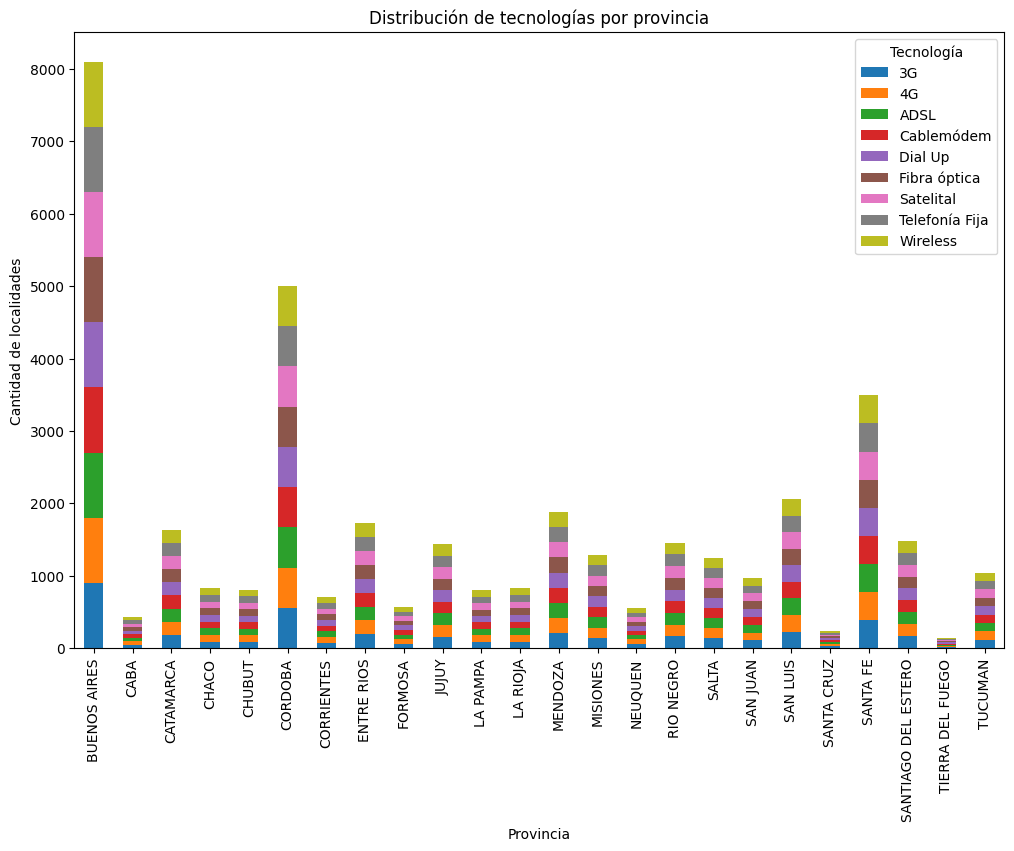

In [133]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas
tabla_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución de tecnologías por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de localidades')
plt.legend(title='Tecnología')
plt.show()

Observaciones generales:

•Dominancia de ciertas tecnologías: Algunas tecnologías parecen ser más comunes que otras en todo el territorio. Por ejemplo, el ADSL y el cablemódem parecen estar muy extendidos en la mayoría de las provincias.

•Patrones regionales: Podría haber patrones regionales en la adopción de tecnologías. Por ejemplo, ciertas regiones (como el centro y centro-este del país) tienen una mayor concentración de cada tecnología debido a factores geográficos y socio-económicos.

•Provincias líderes: Buenos Aires, Córdoba y Santa Fe son claramente las provincias Líderes en cantidad de tecnologías disponibles y accesos, lo cual también puede entenderse como directamente proporcional a la cantidad de habitantes en sus centros urbamos (poseen las ciudades más grandes del país, con mayor densidad poblacional y tambien mayor infraestructura)

•Provincias rezagadas: Las provincias del norte, y las del sur concentran números más modestos, en los que segurmente confluyen aspectos socioeconómicos, y hasta climáticos (como en el caso de Tierra del Fuego, que quizás por cuestiones climáticas extremas no pueda tener una infraestructura de, por ejemplo, fibra óptica, de la misma forma que Córdoba o similares).


# <center>Se proponen los siguientes Kpis de  crecimiento</center>

KPI 1️ : Acceso al servicio de Internet

Métrica: Esta métrica se basa en medir el incremento porcentual del acceso al servicio de internet en cada provincia, calculando el número de hogares con acceso a internet por cada 100 hogares.

Datos Necesarios: Número de hogares con acceso a internet en el trimestre actual y número proyectado de hogares con acceso a internet para el próximo trimestre.

Objetivo: Aumentar en un 2% el número de hogares con acceso a internet por cada 100 hogares en cada provincia para el próximo trimestre.


KPI 2️ : Acceso al servicio de Fibra Óptica

Métrica: Esta métrica se basa en medir el incremento porcentual del acceso al servicio de Fibra Óptica en cada provincia.

Datos Necesarios: Número de hogares con acceso al servicio de Fibra Óptica en el trimestre actual y número proyectado de hogares con acceso al servicio de Fibra Óptica para el próximo trimestre.

Objetivo: Aumentar en un 2% el número de hogares con acceso al servicio de Fibra Óptica en cada provincia para el próximo trimestre.


KPI 3️ : Acceso a conexiones mayores a 20 Mbps

Métrica: Esta métrica se basa en medir el incremento porcentual de las conexiones de internet con velocidades mayores a 20 Mbps en cada provincia.

Datos Necesarios: Número de conexiones actuales con velocidades mayores a 20 Mbps en el trimestre actual y número proyectado de conexiones con velocidades mayores a 20 Mbps para el próximo trimestre.

Objetivo: Aumentar en un 5% las conexiones mayores a 20 Mbps para las provincias que tienen baja velocidad de conexión
